In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor

In [144]:
df = pd.read_csv("data/housing.csv")

In [145]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Verify the presence of 'NULL' entries in the dataset

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Removing 'NULL' entries from dataset

In [147]:
df.dropna(inplace=True)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


# Split data into train and target datasets

In [149]:
X = df.drop(['median_house_value'], axis=1)
Y = df['median_house_value']

In [150]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [151]:
Y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

# Split train data into test and train datasets

In [152]:
X_train, X_test, Y_train, Y_test  = train_test_split(X,Y, test_size=0.2)

In [153]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13940,-117.16,34.26,27.0,9285.0,1621.0,1135.0,410.0,2.5446,INLAND
5763,-118.29,34.16,42.0,413.0,107.0,349.0,107.0,4.3438,<1H OCEAN
179,-122.24,37.80,52.0,1803.0,420.0,1321.0,401.0,2.9570,NEAR BAY
12543,-121.50,38.54,52.0,1145.0,133.0,334.0,138.0,8.3380,INLAND
3168,-118.92,35.26,20.0,3815.0,924.0,3450.0,920.0,2.0174,INLAND
...,...,...,...,...,...,...,...,...,...
9949,-122.40,38.34,33.0,1408.0,273.0,520.0,212.0,3.5781,<1H OCEAN
15067,-116.96,32.79,17.0,5236.0,1325.0,3308.0,1233.0,2.3221,<1H OCEAN
1155,-121.44,39.50,26.0,1652.0,325.0,790.0,292.0,3.0446,INLAND
7156,-118.15,34.04,44.0,647.0,142.0,457.0,143.0,3.6875,<1H OCEAN


In [154]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
2651,-124.10,40.47,52.0,1196.0,236.0,965.0,265.0,3.5345,<1H OCEAN
4467,-118.19,34.06,44.0,1734.0,364.0,1133.0,351.0,2.5132,<1H OCEAN
11562,-117.99,33.75,22.0,3024.0,754.0,2357.0,743.0,3.3125,<1H OCEAN
5425,-118.42,34.02,34.0,2243.0,444.0,973.0,413.0,4.9676,<1H OCEAN
1044,-120.72,38.42,17.0,5654.0,1085.0,2237.0,953.0,3.0465,INLAND
...,...,...,...,...,...,...,...,...,...
2911,-119.05,35.36,30.0,4635.0,800.0,2307.0,754.0,3.6548,INLAND
16316,-121.32,38.00,21.0,1795.0,482.0,1114.0,472.0,2.0091,INLAND
10089,-117.97,33.94,35.0,1928.0,360.0,1056.0,366.0,4.0893,<1H OCEAN
13084,-121.36,38.57,26.0,1793.0,244.0,653.0,235.0,5.6485,INLAND


In [155]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


# Preparing data for model

In [156]:
train_data = X_train.join(Y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
13940,-117.16,34.26,27.0,9285.0,1621.0,1135.0,410.0,2.5446,INLAND,135200.0
5763,-118.29,34.16,42.0,413.0,107.0,349.0,107.0,4.3438,<1H OCEAN,189800.0
179,-122.24,37.80,52.0,1803.0,420.0,1321.0,401.0,2.9570,NEAR BAY,122800.0
12543,-121.50,38.54,52.0,1145.0,133.0,334.0,138.0,8.3380,INLAND,405800.0
3168,-118.92,35.26,20.0,3815.0,924.0,3450.0,920.0,2.0174,INLAND,63700.0
...,...,...,...,...,...,...,...,...,...,...
9949,-122.40,38.34,33.0,1408.0,273.0,520.0,212.0,3.5781,<1H OCEAN,242500.0
15067,-116.96,32.79,17.0,5236.0,1325.0,3308.0,1233.0,2.3221,<1H OCEAN,138800.0
1155,-121.44,39.50,26.0,1652.0,325.0,790.0,292.0,3.0446,INLAND,90800.0
7156,-118.15,34.04,44.0,647.0,142.0,457.0,143.0,3.6875,<1H OCEAN,162500.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

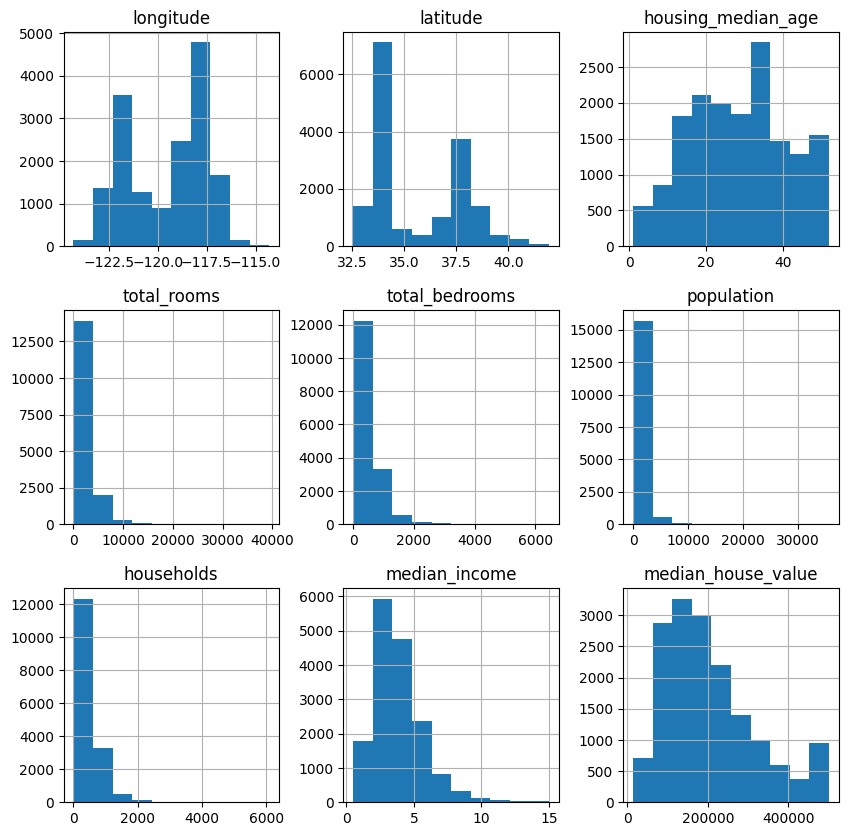

In [157]:
train_data.hist(figsize=(10,10))

In [158]:
train_data_corr = train_data.drop(['ocean_proximity'], axis=1 )

In [159]:
train_data_corr.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924305,-0.109834,0.042533,0.067457,0.098257,0.054807,-0.016706,-0.045154
latitude,-0.924305,1.000000,0.013216,-0.034097,-0.064952,-0.106336,-0.069499,-0.079118,-0.145121
housing_median_age,-0.109834,0.013216,1.000000,-0.357038,-0.317064,-0.292634,-0.300188,-0.115374,0.109754
total_rooms,0.042533,-0.034097,-0.357038,1.000000,0.930580,0.858705,0.920419,0.193706,0.130741
total_bedrooms,0.067457,-0.064952,-0.317064,0.930580,1.000000,0.879235,0.980732,-0.011056,0.047874
population,0.098257,-0.106336,-0.292634,0.858705,0.879235,1.000000,0.907102,0.000859,-0.027749
households,0.054807,-0.069499,-0.300188,0.920419,0.980732,0.907102,1.000000,0.010221,0.063310
median_income,-0.016706,-0.079118,-0.115374,0.193706,-0.011056,0.000859,0.010221,1.000000,0.688684
median_house_value,-0.045154,-0.145121,0.109754,0.130741,0.047874,-0.027749,0.063310,0.688684,1.000000


<Axes: >

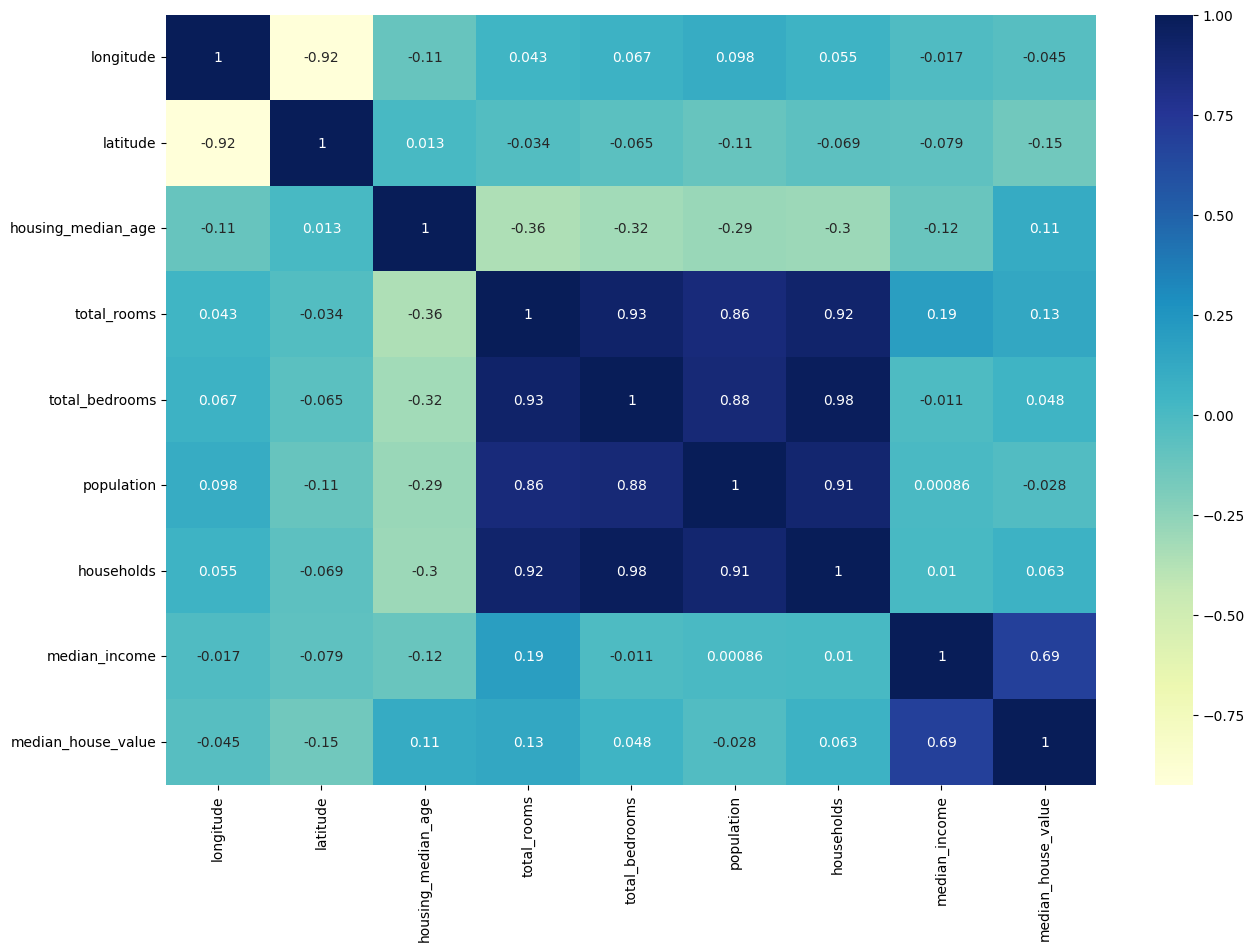

In [160]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(train_data_corr.corr(), annot=True, cmap="YlGnBu", ax=ax)

# Replacing 'ocean_proximity' String columns with numerical values 

In [161]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7233
INLAND        5231
NEAR OCEAN    2072
NEAR BAY      1806
ISLAND           4
Name: count, dtype: int64

In [162]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity).replace({True: 1, False: 0})).drop(['ocean_proximity'], axis=1)

In [163]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
13940,-117.16,34.26,27.0,9285.0,1621.0,1135.0,410.0,2.5446,135200.0,0,1,0,0,0
5763,-118.29,34.16,42.0,413.0,107.0,349.0,107.0,4.3438,189800.0,1,0,0,0,0
179,-122.24,37.80,52.0,1803.0,420.0,1321.0,401.0,2.9570,122800.0,0,0,0,1,0
12543,-121.50,38.54,52.0,1145.0,133.0,334.0,138.0,8.3380,405800.0,0,1,0,0,0
3168,-118.92,35.26,20.0,3815.0,924.0,3450.0,920.0,2.0174,63700.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9949,-122.40,38.34,33.0,1408.0,273.0,520.0,212.0,3.5781,242500.0,1,0,0,0,0
15067,-116.96,32.79,17.0,5236.0,1325.0,3308.0,1233.0,2.3221,138800.0,1,0,0,0,0
1155,-121.44,39.50,26.0,1652.0,325.0,790.0,292.0,3.0446,90800.0,0,1,0,0,0
7156,-118.15,34.04,44.0,647.0,142.0,457.0,143.0,3.6875,162500.0,1,0,0,0,0


# Corelation heatmap 

<Axes: >

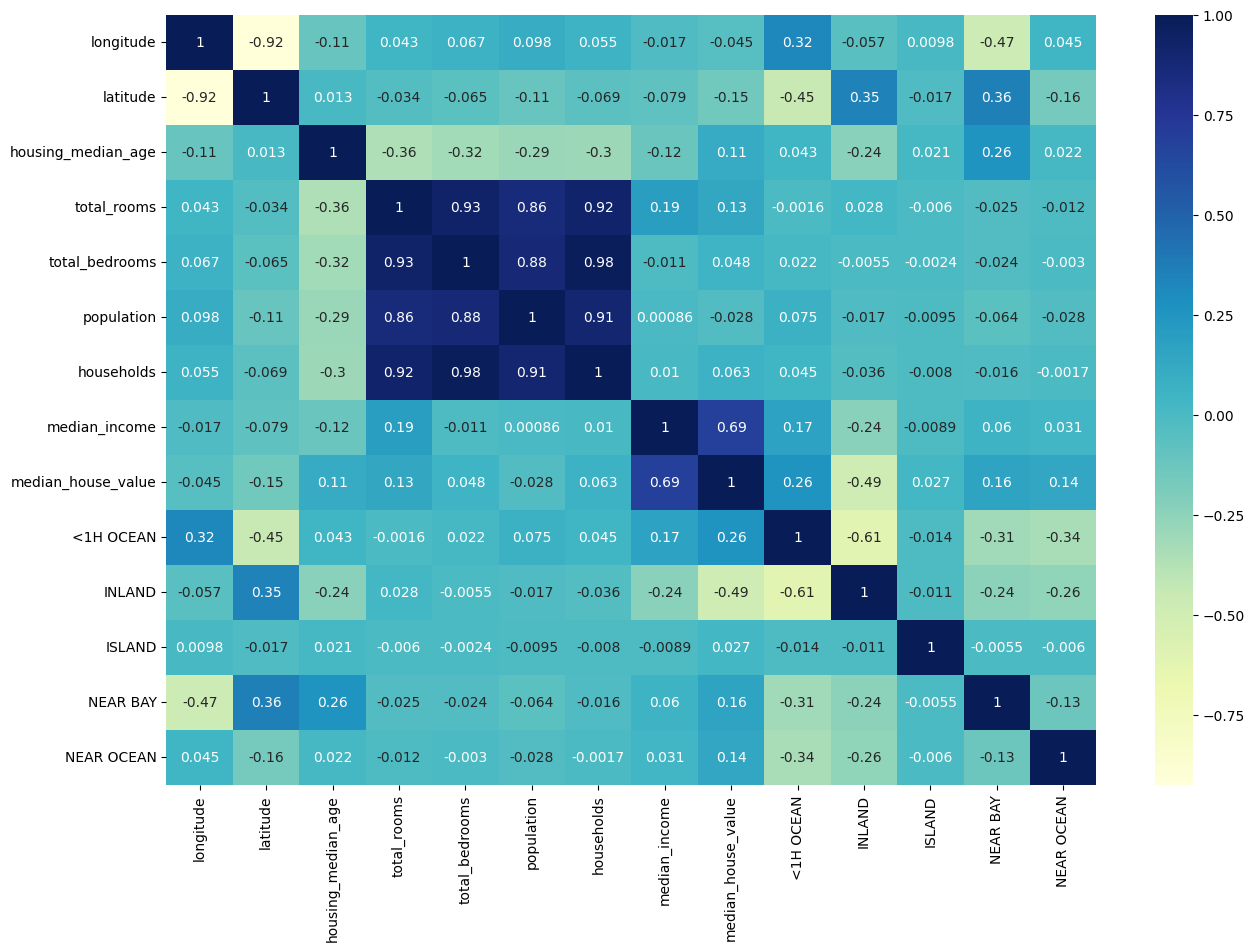

In [164]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu", ax=ax)

# log columns distribution

In [165]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>, <Axes: >, <Axes: >]],
      dtype=object)

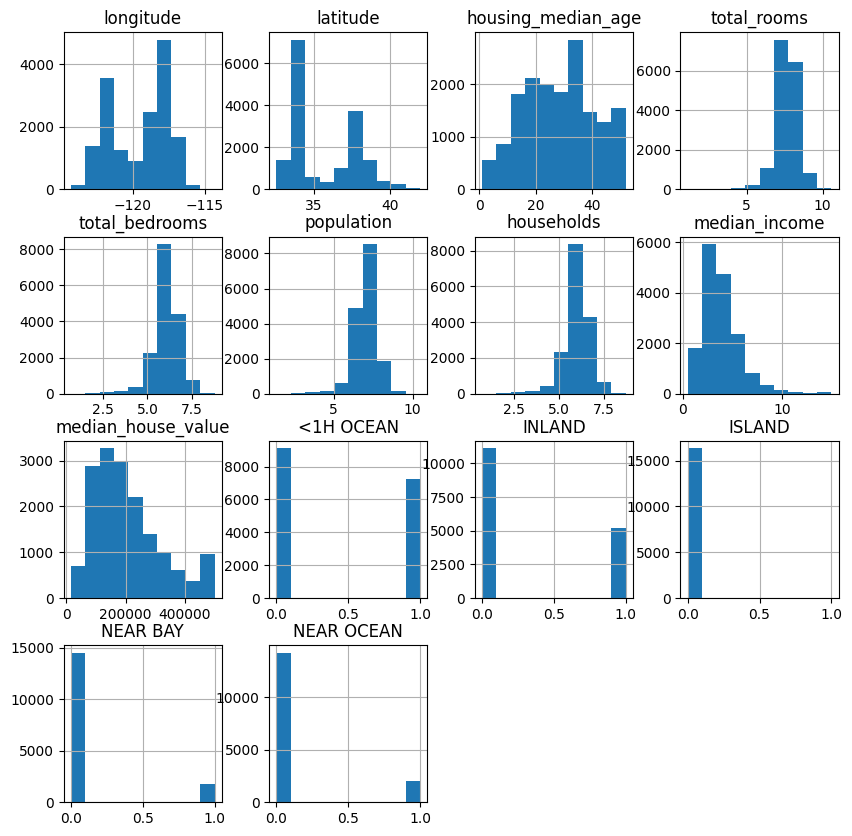

In [166]:
train_data.hist(figsize=(10,10))

# Plotting the data on a coordinate grid against the price.

<Axes: xlabel='latitude', ylabel='longitude'>

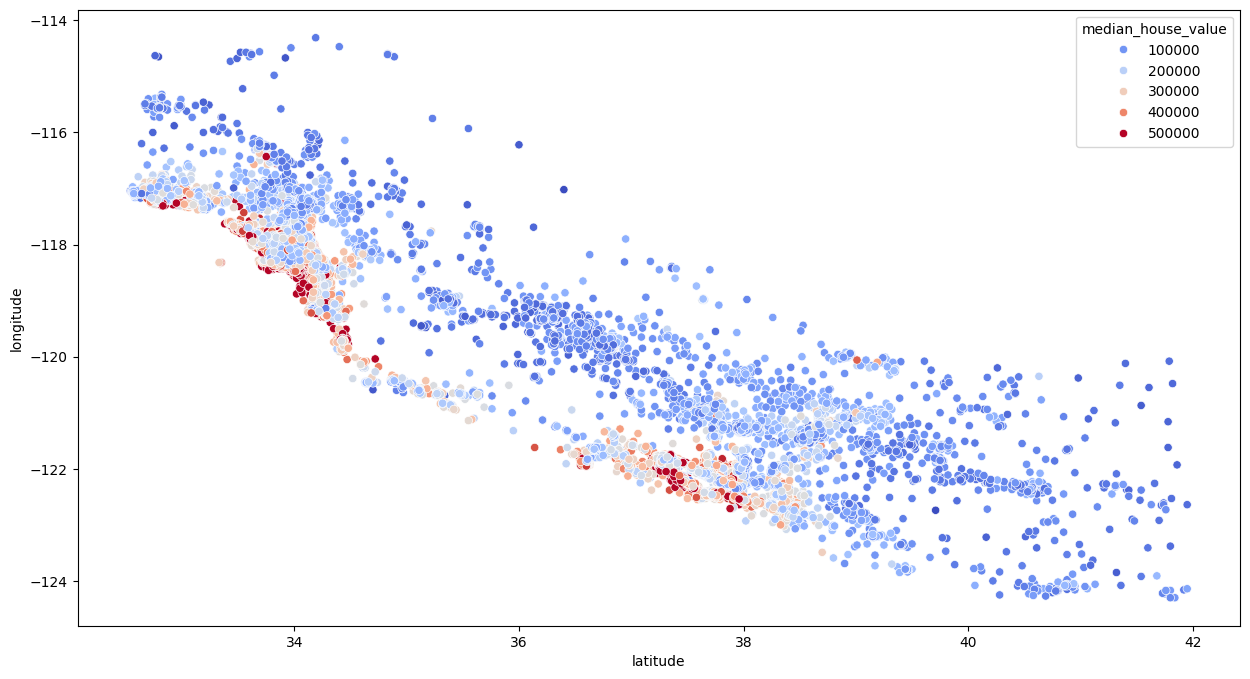

In [167]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

# Trying to create some additionals features, that have more corelations to the target value. In this case: Bedroom ratio and rooms in household

In [168]:
train_data['bedroom_percentage'] = train_data['total_bedrooms']/train_data['total_rooms']#
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

<Axes: >

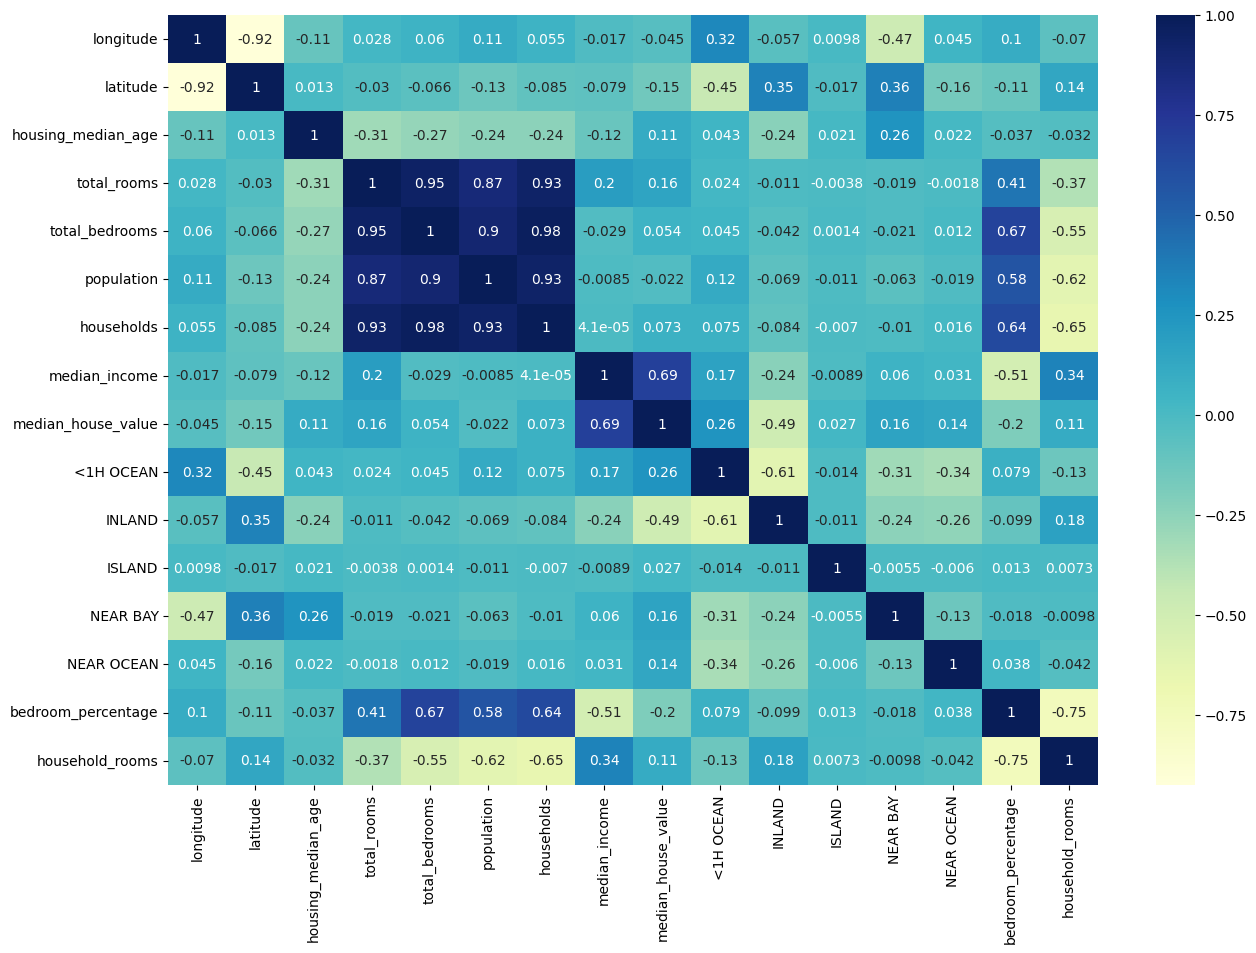

In [169]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu", ax=ax)

# Linear regression model

In [170]:
X_train, Y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg = LinearRegression()

reg.fit(X_train, Y_train)

LinearRegression()

In [171]:
test_data = X_test.join(Y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity).replace({True: 1, False: 0})).drop(['ocean_proximity'], axis=1)

test_data['bedroom_percentage'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']



In [172]:
X_test, Y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [173]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_percentage,household_rooms
2651,-124.10,40.47,52.0,7.087574,5.468060,6.873164,5.583496,3.5345,55000.0,1,0,0,0,0,0.771500,1.269379
4467,-118.19,34.06,44.0,7.458763,5.899897,7.033506,5.863631,2.5132,163100.0,1,0,0,0,0,0.791002,1.272038
11562,-117.99,33.75,22.0,8.014666,6.626718,7.765569,6.612041,3.3125,191800.0,1,0,0,0,0,0.826824,1.212132
5425,-118.42,34.02,34.0,7.716015,6.098074,6.881411,6.025866,4.9676,414100.0,1,0,0,0,0,0.790314,1.280482
1044,-120.72,38.42,17.0,8.640295,6.990257,7.713338,6.860664,3.0465,144100.0,0,1,0,0,0,0.809030,1.259396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,-119.05,35.36,30.0,8.441607,6.685861,7.744137,6.626718,3.6548,84700.0,0,1,0,0,0,0.792013,1.273875
16316,-121.32,38.00,21.0,7.493317,6.180017,7.016610,6.159095,2.0091,101500.0,0,1,0,0,0,0.824737,1.216626
10089,-117.97,33.94,35.0,7.564757,5.888878,6.963190,5.905362,4.0893,215700.0,1,0,0,0,0,0.778462,1.280998
13084,-121.36,38.57,26.0,7.492203,5.501258,6.483107,5.463832,5.6485,129500.0,0,1,0,0,0,0.734264,1.371236


In [174]:
reg.score(X_test, Y_test)

0.658653667540813

# The same linear regression model, but with scailing of data.

In [175]:
X_train, Y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

scaler = StandardScaler()

X_train_scale = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_scale, Y_train)

LinearRegression()

In [176]:
X_test_scale = scaler.transform(X_test)

In [177]:
reg.score(X_test_scale, Y_test)

0.6585852839969419

# Random Forest model

In [178]:
forest  = RandomForestRegressor()
forest.fit(X_train, Y_train)

RandomForestRegressor()

In [179]:
forest.score(X_test, Y_test)

0.8044175210959412

# Random Forest with scale data

In [180]:
forest  = RandomForestRegressor()
forest.fit(X_train_scale, Y_train)

RandomForestRegressor()

In [181]:
forest.score(X_test_scale, Y_test)

0.8035611915320497